In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB09')

# Check its architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [4]:
df = pd.read_csv("C:/Users/yanzh/Desktop/BB09.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.16
chlorophylla_max = 12.23
time_min = 34708
time_max = 44354.4305555556

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min

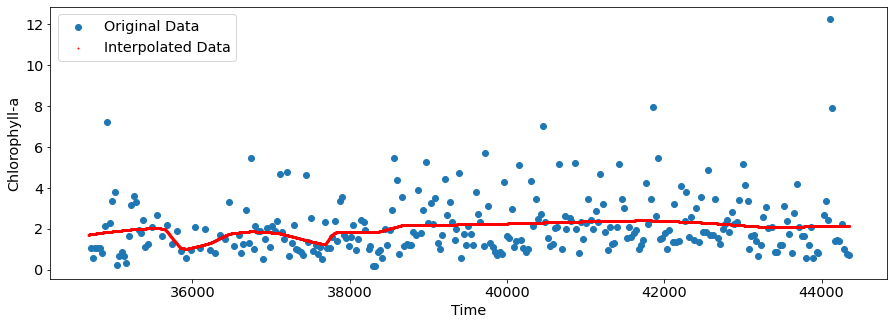

In [5]:
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()

In [6]:
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

313/313 [==============================] - 0s 330us/step - loss: 7.4901e-17
['loss']


In [7]:
interpolation = model.predict([0.078681953
,0.084798205
,0.091121788
,0.097445371
,0.103768953
,0.110092536
,0.116519784
,0.122636035
,0.128959618
,0.138496825
,0.141606783
,0.147930366
,0.154357614
,0.160473866
,0.166797448
,0.173121031
,0.179444613
,0.185768196
,0.192195444
,0.895771752
,0.962013871
])
interpolation

array([[0.1547265 ],
       [0.15529044],
       [0.15437353],
       [0.149869  ],
       [0.12893252],
       [0.10455745],
       [0.081417  ],
       [0.07275217],
       [0.07302963],
       [0.07985938],
       [0.08208648],
       [0.0868149 ],
       [0.09249511],
       [0.09916591],
       [0.10877938],
       [0.1185339 ],
       [0.1282708 ],
       [0.13381109],
       [0.1362273 ],
       [0.16022506],
       [0.16267952]], dtype=float32)